# Linear regression

Import all the modules you will need in this notebook here:

In [250]:
# exercise 0
# Put your solution here!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [251]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
path = get_path('fram.txt')

fram = pd.read_csv(path, sep='\t')
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [252]:
# exercise 2
# Put your solution here!
def rescale(series): 
    #centering
    series = series - series.mean()

    #applying standard deviation
    return series / (2 * series.std())

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [253]:
# exercise 3
# Put your solution here!
cols_before = fram.columns
print('columns before:', len(fram.columns))

fram['sAGE'] = rescale(fram['AGE'])
fram['sFRW'] = rescale(fram['FRW'])
fram['sSBP'] = rescale(fram['SBP'])
fram['sDBP'] = rescale(fram['DBP'])
fram['sCHOL'] = rescale(fram['CHOL'])
fram['sCIG'] = rescale(fram['CIG'])

print('columns after:', len(fram.columns))
#set difference between columns before and after scaling
print('new columns:', set(fram.columns) - set(cols_before))

columns before: 14
columns after: 20
new columns: {'sCIG', 'sAGE', 'sFRW', 'sCHOL', 'sDBP', 'sSBP'}


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [254]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           4.13e-40
Time:                        14:43:20   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [255]:
# exercise 5
# Put your solution here! 
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.44e-46
Time:                        14:43:20   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
Inclusion of age increases the explanatory power by 0.021 units, which is the difference of the two R-squared measured (0.146 - 0.125).  
sFRW and sAGE seem to affect the target variable most, because of their coefficients are much larger.
***

Try to add to the model all the interactions with other variables. 

In [256]:
# exercise 6
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:SEX + sCHOL:sFRW + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL', 
data=fram
).fit()

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

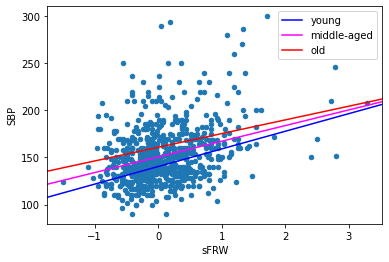

In [257]:
# exercise 7
# Put your solution here!

#params
p = fit.params 

#scatter
fram[fram.SEX=="female"].plot.scatter("sFRW","SBP")

#lines
abline_plot(
    intercept=p.Intercept-p["sAGE"], 
    slope=p.sFRW-p["sAGE:sFRW"],
    ax=plt.gca(), 
    color="blue", 
    label="young"
)
abline_plot(
    intercept=p.Intercept, 
    slope=p.sFRW,
    ax=plt.gca(), 
    color="magenta", 
    label="middle-aged"
)
abline_plot(
    intercept=p.Intercept+p["sAGE"], 
    slope=p.sFRW+p["sAGE:sFRW"],
    ax=plt.gca(), 
    color="red", 
    label="old"
)
plt.legend()


How does the dependence of blood pressure on weight change as a person gets older?
***

As a person gets older, the blood pressure of a person increases. The dependence of blood pressure on weight, on the other hand, seems to decrease as a person gets older.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           2.99e-40
Time:                        14:43:21   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

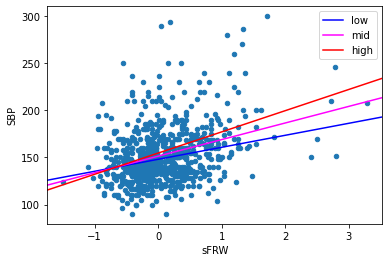

In [258]:
# exercise 8
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:SEX + sCHOL:sFRW + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE', 
data=fram
).fit()

print(fit.summary())

#params
p = fit.params 

#sFRW seems to have the highest std coef
#scatter
fram[fram.SEX=="female"].plot.scatter("sFRW","SBP")

#lines
abline_plot(
    intercept=p.Intercept-p["sCHOL"], 
    slope=p.sFRW-p["sCHOL:sFRW"],
    ax=plt.gca(), 
    color="blue", 
    label="low"
)
abline_plot(
    intercept=p.Intercept, 
    slope=p.sFRW,
    ax=plt.gca(), 
    color="magenta", 
    label="mid"
)
abline_plot(
    intercept=p.Intercept+p["sCHOL"], 
    slope=p.sFRW+p["sCHOL:sFRW"],
    ax=plt.gca(), 
    color="red", 
    label="high"
)
plt.legend()


How does the model and its accuracy look?

***

The accuracy of the model does not look particularly good. R-squared is only 0.152, which is quite low.
***

# Logistic regression

In [259]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [260]:
# exercise 9
# Put your solution here!

#HIGH_BP column
fram['HIGH_BP'] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype('int')

fit = smf.glm(
    formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW', 
    data=fram, 
    family=sm.families.Binomial()
).fit()

#error rate
error_rate_orig = np.mean(
    ((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
    ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP)
)

print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Tue, 13 Jul 2021   Deviance:                       1713.7
Time:                        14:43:22   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [261]:
# exercise 10
# Put your solution here!
fit = smf.glm(
    formula='HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX',
    data=fram,
    family=sm.families.Binomial()
).fit()

fit.summary()

error_rate = np.mean(
    ((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
    ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP)
)

print('Original error rate:', error_rate_orig)
print('Current:', error_rate)
print('Difference (original - current):', error_rate_orig - error_rate)


Original error rate: 0.35581061692969873
Current: 0.3278335724533716
Difference (original - current): 0.02797704447632715


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

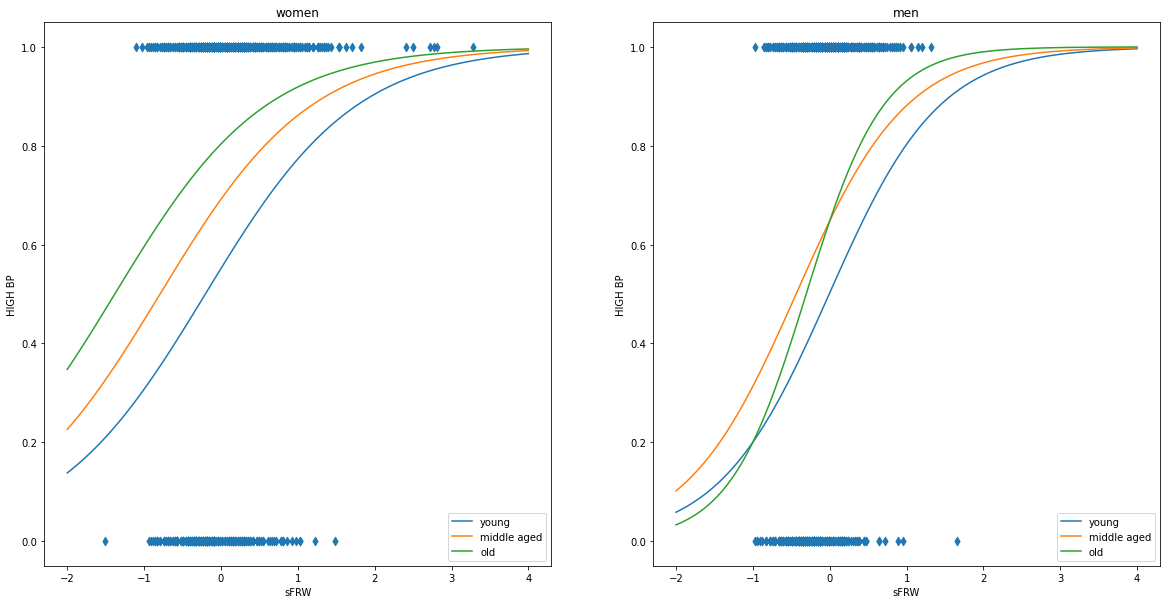

In [262]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


# Put your solution here!
fig, ax = plt.subplots(
    1, 2, subplot_kw={'xlabel': 'sFRW', 'ylabel': 'HIGH BP'}, figsize=(20, 10))

X = np.linspace(-2, 4, 100)

p = fit.params

# plot 1.
ax[0].scatter(
    fram.sFRW[((fram.SEX == "female"))],
    fram.HIGH_BP[(fram.SEX == "female")],
    marker="d"
)

ax[0].plot(X, logistic(X * p.sFRW + p.Intercept - p['sAGE']), label="young")
ax[0].plot(X, logistic(X * p.sFRW + p.Intercept), label="middle aged")
ax[0].plot(X, logistic(X * p.sFRW + p.Intercept + p['sAGE']), label="old")

ax[0].set_title('women')

ax[0].legend()

# plot 2.
ax[1].scatter(
    fram.sFRW[((fram.SEX == "male"))],
    fram.HIGH_BP[(fram.SEX == "male")],
    marker="d"
)
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) +
           p["SEX[T.male]"] + p.Intercept - p['sAGE']), label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) +
           p["SEX[T.male]"] + p.Intercept), label="middle aged")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]+p['sAGE']) +
           p["SEX[T.male]"] + p.Intercept), label="old")

ax[1].set_title('men')

ax[1].legend()


How do the models with different ages and genders differ from each other?

***

Younger women who have lowerr weight seem to have higher chance of having high blood pressure compared to men.

***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [263]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):

    #sampling
    train = df.sample(frac=train_fraction)
    #dropping the sampled values from the original
    test = df.drop(train.index)
    
    return train, test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [264]:
# exercise 13
np.random.seed(1)
# Put your solution here!

error_model = []
error_null = []

for i in range(100):
    error_rate = []

    # splitting the data
    train, test = train_test_split(fram, 0.8)

    # using train-data to fit
    fit = smf.glm(
        formula="HIGH_BP ~ sFRW + SEX + sFRW:SEX + sAGE + sFRW:sAGE + SEX:sAGE",
        data=train,
        family=sm.families.Binomial()
    ).fit()

    pred = fit.predict(test, transform=True)

    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP == 1))
                         | ((pred > 0.5) & (test.HIGH_BP == 0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())


print(np.mean(error_model), np.mean(error_null))

statsmodels.stats.stattools.stats.mannwhitneyu(
    error_model,
    error_null,
    alternative="two-sided"
)


0.3311827956989247 0.3488530465949821


MannwhitneyuResult(statistic=3020.0, pvalue=1.2819846293843994e-06)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [265]:
# exercise 14
# Put your solution here!

#mask to filter values
condition = fram['CHD'] > 0

# if condition == true, then 1, else 0, this way we don't have to convert boolean to int
fram['hasCHD'] = np.where(condition, 1, 0)

print('Value counts:\n', fram.hasCHD.value_counts())
print('hasCHD mean:\n', np.mean(fram.hasCHD))

Value counts:
 0    1087
1     307
Name: hasCHD, dtype: int64
hasCHD mean:
 0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [266]:
# exercise 15
# Put your solution here!

fit = smf.glm(
    formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", 
    data=fram, 
    family=sm.families.Binomial()
).fit()

print(fit.summary())

error_rate = np.mean(
    ((fit.fittedvalues < 0.5) & fram.hasCHD) |
    ((fit.fittedvalues > 0.5) & ~fram.hasCHD)) 

print('Error rate:', format(error_rate, '.3f'))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 13 Jul 2021   Deviance:                       1442.4
Time:                        14:43:26   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

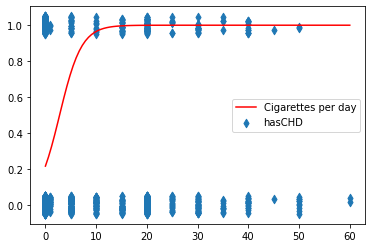

In [267]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


# Put your solution here!
p = fit.params
X = np.linspace(0, max(fram.CIG), 100)
jitter = np.random.uniform(low=-0.05, high=0.05, size=len(fram))

plt.plot(X, logistic(X*p.sCIG + p.Intercept),
         label='Cigarettes per day', color='red')
plt.scatter(fram.CIG, fram.hasCHD + jitter, label='hasCHD', marker='d')

plt.legend()


Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***

Error rate of the model is 0.22, so I think that the prediction accuracy is sufficient.  
I think the model has some practical use. For example, we can see that even a few cigarettes seem to increase the probability of having a heart disease and after ten, it is almost sure based on the curve.

***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal heart disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [268]:
# exercise 17
# Put your solution here!

#normalized values into a dict
point = {
    'sCHOL': (200 - fram.CHOL.mean())/(2 * fram.CHOL.std()),
    'sCIG': (17 - fram.CIG.mean())/(2 * fram.CIG.std()),
    'sFRW': (100 - fram.FRW.mean())/(2 * fram.FRW.std()),
}

print('rescaled values:')
[print(key,':',value) for key, value in point.items()]

#predicting
predicted = fit.predict(point)[0]

print('\nThe predicted probability is:', format(predicted, '.3f'))


rescaled values:
sCHOL : -0.37410417825308123
sCIG : 0.3871927538102121
sFRW : -0.15110941235605307

The predicted probability is: 0.216
